# Assignment 8: Exploratory Data Analysis and Visualization

## Instructions

1. Fill in the code where indicated to complete the assignment. Feel free to add more cells than provided to try things out, and check what your variables look like, to see if you got the right results. Just make sure you have done what is asked for that question and that you don't delete any code we provide you with.

2. Rename this `last_first_assignment8.ipynb` file replacing `last` and `first` with your name. Make sure all the outputs are there (run each cell) and then export as `last_first_assignment8.py` as well.

3. Submit thes files to Quercus.

## Questions and Support
1. Please ask class content questions on the class GitHub page: 
https://github.com/BME1478H/Winter2020class/ Expect a processing time of 1d for us to respond. As such, we cannot guarantee we can address your questions and work through all the troubleshooting in time if you ask them the night before or the day of the assignment deadline. Please plan accordingly. 
2. Attend Wednesday Tutorial, 9-11am at UC140. 
3. If there are sensitive questions, submit to BME1478h.ta.team@gmail.com, 

Before we start, let's generate some example data, load in the data and import the packages we will need.  

**Run the following cells to get started and do not change any of this code**.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns #visualisation
import matplotlib.pyplot as plt #visualisation

# load in our gapminder dataset
url = 'https://raw.githubusercontent.com/BME1478H/Winter2020class/master/data/world-data-gapminder.csv'
world_data = pd.read_csv(url)

In [2]:
# load pre-downloaded seaborn exercise study dataset for assignment
exercise = sns.load_dataset('exercise')
exercise.head()

,Unnamed: 0,id,diet,pulse,time,kind
0,0,1,low fat,85,1 min,rest
1,1,1,low fat,85,15 min,rest
2,2,1,low fat,88,30 min,rest
3,3,2,low fat,90,1 min,rest
4,4,2,low fat,92,15 min,rest


In [3]:
# load pre-downloaded seaborn fmri-gammas dataset for assignment
gammas = sns.load_dataset('gammas')
gammas.head()

,timepoint,ROI,subject,BOLD signal
0,0.0,IPS,0,0.513433
1,0.0,IPS,1,-0.414368
2,0.0,IPS,2,0.214695
3,0.0,IPS,3,0.814809
4,0.0,IPS,4,-0.894992


`seaborn` comes with a number of pre-loaded datasets you can use to practice plotting and exploratory data analysis. You can see all the available datasets [here](https://github.com/mwaskom/seaborn-data) or by typing `sns.get_dataset_names()`. 

One dataset we will use is called `exercise` which measures pulse in subjects on either a no fat or low fat diet, at multiple time intervals while during different types of activity/exercise.

The other dataset is `gammas` which is a pre-processed dataset of fMRI (functional magnetic resonance imaging) experiments. In the dataset, we have the BOLD (blood oxygen level dependant), signal which is used as a measure of brain activity of specific regions of interest (ROI), measured across multiple timepoints, in 19 different subjects. 
___
## Task 1 (2 marks)

a. What are the three different `ROI` (i.e. brain regions) the experimenters looked at in the `gammas` dataset? (0.25 marks)

In [4]:
unique_rois = gammas["ROI"].unique() 

# do not change the code below, write your answer code above
print(unique_rois)

['IPS' 'AG' 'V1']


Hint: use the `unique()` method on the column you are checking.
___

b. How many `subjects` are there in the study? Final answer should be one number. (0.25 marks)

In [5]:
no_subjects = len(gammas['subject'].unique())

# do not change the code below, write your answer code above
print(no_subjects)

20


Hint: use `unique()` as you did before, but now you want to know how many values `unique()` outputs. 
___

c. In `gammas`, what is the mean, min and max of the `BOLD signal` in each `ROI`? (0.5 marks) 

In [6]:
summary_BOLD = gammas.groupby("ROI")["BOLD signal"].agg(['mean', 'min', 'max'])

# do not change the code below, write your answer code above
print(summary_BOLD)

         mean       min       max
ROI                              
AG   1.679276 -1.695759  4.770516
IPS  0.447858 -3.611603  4.829915
V1   0.317376 -3.140057  3.507984


Hint: Split-apply-combine methods for pandas dataframes include `groupby()` to split the data and `agg()` to apply the aggregated operations (min/max/mean) when there are multiple operations you want to apply. 

Hint: `agg()` expects all the functions you want to apply to your data to be enclosed in a list. How do you denote a list in Python?

_______

d. Use seaborn to plot a `boxplot()` of the `BOLD signal` in the different `ROI`. (0.25 marks)

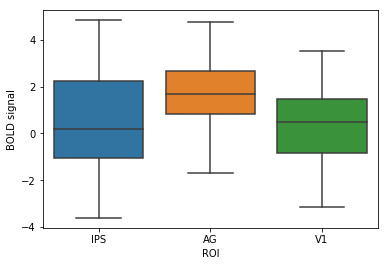

In [7]:
g = sns.boxplot('ROI', 'BOLD signal', data=gammas)

Hint: Did you use the correct nickname we defined for `seaborn` at the start of the notebook?

Hint: What is your independant variable (x-axis) and dependant variable (y-axis)?
____

e. The `gammas` study measures the BOLD signal across multiple timepoints so perhaps we are missing on some important patterns in the data by averaging over all the timepoints. 

What is the `mean` of the `BOLD signal` in each `ROI` at each `timepoint` (i.e. averaged across all patients)? (0.5 marks)

In [8]:
summary_BOLD_time = gammas.groupby(["ROI", "timepoint"])["BOLD signal"].mean()

# do not change the code below, write your answer code above
print(summary_BOLD_time.head())

ROI  timepoint
AG   0.00000      0.717300
     0.10101      0.717339
     0.20202      0.717867
     0.30303      0.719895
     0.40404      0.724713
Name: BOLD signal, dtype: float64


Hint: `groupby()` expects the columns to split the dataframe by to be enclosed in a list if there is more than one column.
___

f. There are many timepoints so it is hard to tell what is going on just by looking. Use `seaborn` to plot a `lineplot()` of the `BOLD signal` across the different `timepoint`, where each `ROI` in the dataframe is a differently colored line. (0.25 marks)

Note, this might take some time to load. 

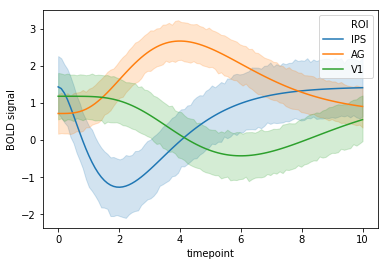

In [9]:
ax = sns.lineplot('timepoint', 'BOLD signal', hue='ROI', data=gammas)

Hint: the `hue` parameter is available in most `seaborn` plotting functions to indicate which column to use to group the data by and separate the aggregated values for the plot by a different hue/color.
___

## Task 2 (2 marks)

In [10]:
# run this to inspect the exercise dataframe
print(exercise.columns)
exercise.head(2)

Index(['Unnamed: 0', 'id', 'diet', 'pulse', 'time', 'kind'], dtype='object')


,Unnamed: 0,id,diet,pulse,time,kind
0,0,1,low fat,85,1 min,rest
1,1,1,low fat,85,15 min,rest


a. Notice in the `exercise` dataset that there are is an extra column `Unnamed: 0` which is a duplicate of the index (row number). Remove the extra column from `exercise`. (0.25 marks)

In [11]:
exercise_clean = exercise.iloc[:, 1:]

# do not change the code below, write your answer code above
exercise_clean.head()

,id,diet,pulse,time,kind
0,1,low fat,85,1 min,rest
1,1,low fat,85,15 min,rest
2,1,low fat,88,30 min,rest
3,2,low fat,90,1 min,rest
4,2,low fat,92,15 min,rest


Hint: The `Unnamed: 0` column is the first column. Is there a way to slice the dataframe keeping all the rows but only from the second column onward? 

Alternatively, you can make use of the `dataframe.drop()` method (documentation and examples here: https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.drop.html)
___

b. Using our cleaned dataset `exercise_clean` from task (a), check whether we have the same number of subjects (`id`) for each diet group (`no fat` and `low fat`) using `nunique()` and only display the counts per group for the `id` column.

Read the docs for `nunique()` here: https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.core.groupby.DataFrameGroupBy.nunique.html?highlight=nunique#pandas.core.groupby.DataFrameGroupBy.nunique

(0.25 marks)

In [12]:
ids_per_diet = exercise_clean.groupby("diet").nunique()['id']


# do not change the code below, write your answer code above
ids_per_diet

diet
no fat     15
low fat    15
Name: id, dtype: int64

Hint: From the documentation, we see that `nunique()` returns DataFrame with number of distinct observations per group _for each column_. We only want to display the subject id. 
___

c. Using `exercise_clean`, what is the average `pulse` for each of the `diet` types only in the observations taken during `rest`? Subset your data first. (0.5 marks)

In [13]:
rest = exercise_clean[exercise_clean.kind == 'rest']

pulse_rest = rest.groupby('diet')['pulse'].mean()

print(pulse_rest)

diet
no fat     92.333333
low fat    89.333333
Name: pulse, dtype: float64


______
From the lesson, we saw that we could plot multiple categorical variables using `catplot()` in `seaborn`. 
Try running the following plotting code to make sense of the necessary components of `catplot()` function:

```
sns.catplot(x='life_expectancy', y='income_group', data=world_data[world_data.year == 2014], kind='box',
            col='region', col_wrap=3)
```

d. Use the `exercise_clean` dataframe. Use `catplot()` to with `kind='point'` where:
- `time` is plotted on the x-axis and `pulse` is plotted on the `y-axis`. 
- each of the  subplots should have a different colored line for each type of `diet`
- along the column (`col`) of the catplot should be the different levels of exercise (i.e. `kind`). 

The end result should be 1 row of 3 subplots (one for each kind of exercise/activity). (0.5 marks)

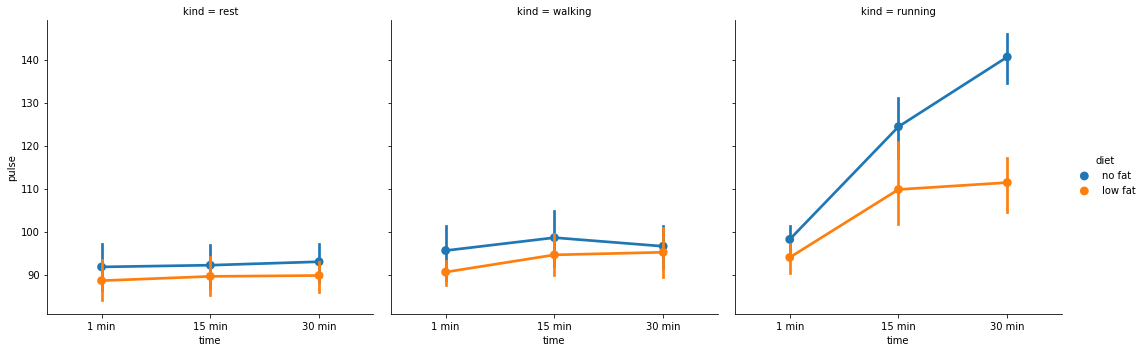

In [14]:
sns.catplot("time", "pulse", hue="diet", data=exercise, col="kind", kind='point')

___
You may notice in the plot from (d) that the difference between the pulse of subjects in the `no fat` and `low fat` diet is similar in most time points and kinds of activity, but there is a more obvious difference between groups in the `running` condition. Let's look more closely.

e. Plot a `boxplot()` specifically of the `pulse` of the `no fat` and `low fat` diet groups for each `time` point in the `running` group. 
Start by subsetting the data into a new variable. 

(0.25 marks for subsetting data, 0.25 marks for the correct plot = 0.5 marks total)

In [15]:
# subset your data here
running = exercise_clean[exercise_clean.kind == 'running']

print(running.head())

    id     diet  pulse    time     kind
60  21  low fat     93   1 min  running
61  21  low fat     98  15 min  running
62  21  low fat    110  30 min  running
63  22  low fat     98   1 min  running
64  22  low fat    104  15 min  running


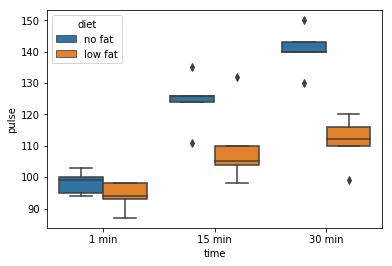

In [16]:
# code the boxplot here
sns.boxplot('time', 'pulse', hue='diet', data=running);

## Task 3 (2 marks)

Going back to the `world_data` gapminder data, let's explore the data even more. 

a. Create a new column in `world_data` called `education_ratio` that represents the ratio between `years_in_school_women` and `years_in_school_men` (i.e. `years_in_school_men` is the denominator) (0.25 marks)

In [17]:
world_data['education_ratio'] = world_data['years_in_school_women'] / world_data['years_in_school_men']

b. Display the five (5) largest `education_ratio` observations in descending order (using `dataframe.nlargest(number, column_name)` where number is the number of observations to find) (0.25 marks)
  - the results should be limited data from the year 2010 (0.25 marks)
  - and only include the columns `country`, `year`, and `education_ratio`. (0.25 marks)

The answer should all be in one code cell, it is possible to do in one line but may be easier and more readable to split across more than one line. (0.75 marks total)

In [18]:
world_2010 = world_data[world_data.year == 2010]
top_education_ratio_2010 = world_2010.nlargest(5, 'education_ratio')[['country', 'year', 'education_ratio']]

# do not change the code below, write your answer code above
top_education_ratio_2010

,country,year,education_ratio
19701,Lesotho,2010,1.263087
28461,Qatar,2010,1.222766
4809,Botswana,2010,1.125714
5028,Brazil,2010,1.121328
25176,Nicaragua,2010,1.115176


Hint: Start by filtering your data to meet the required criteria
- then you can look for the rows with the top values within that filtered subset
- and finally you can choose which columns to display from that.

___
Let's compare the distribution of country life expectancies in 1800 to the population in 2000 in the different regions of the world. 

c. Subset your data to only include rows where the `year` is either 1800 or 2000. (0.25 marks)

In [19]:
world_1800_2000 = world_data.loc[world_data['year'].isin([1800, 2000])]

world_1800_2000.head()

,country,year,population,region,sub_region,income_group,life_expectancy,income,children_per_woman,child_mortality,pop_density,co2_per_capita,years_in_school_men,years_in_school_women,education_ratio
0,Afghanistan,1800,3280000,Asia,Southern Asia,Low,28.2,603,7.00,469.0,NaN,NaN,NaN,NaN,NaN
200,Afghanistan,2000,20100000,Asia,Southern Asia,Low,51.6,972,7.49,130.0,30.8,0.0385,2.90,0.59,0.203448
219,Albania,1800,410000,Europe,Southern Europe,Upper middle,35.4,667,4.60,375.0,NaN,NaN,NaN,NaN,NaN
419,Albania,2000,3120000,Europe,Southern Europe,Upper middle,74.4,5470,2.16,26.0,114.0,0.9680,9.97,9.87,0.989970
438,Algeria,1800,2500000,Africa,Northern Africa,Upper middle,28.8,715,6.99,460.0,NaN,NaN,NaN,NaN,NaN


d. Use `catplot()` to plot multiple violin plots of the `world_1800_2000` subset data where:
  - `region` is along the x-axis, `life_expectancy` is along the y-axis
  - `hue` is determined by `year`
  - `split=True` (i.e. each half of the violinplot is data from year 1800 or 2000)

(0.75 marks)

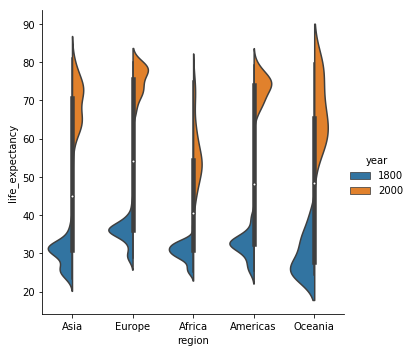

In [20]:
g = sns.catplot(x='region', y='life_expectancy', data=world_1800_2000, kind='violin',
            hue='year', split=True)